Medical Cost Personal Dataset

In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Read insurance data

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#Let's try one-hot-encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [14]:
#Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X,y








(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [15]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [17]:
#Build a model sort of like model_2 before
tf.random.set_seed(42)

#1 create a model

insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)])

#2 Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#3. fit the model

insurance_model.fit(X_train,y_train, epochs=100)

2021-07-11 09:58:43.642522: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
34/34 [==============================] - 0s 589us/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 553us/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 543us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 514us/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 497us/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 501us/step - loss: 7595.3940 - mae: 759

In [18]:
#Check the results of the insurance data on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 588us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

this model is trash....fix it




In [28]:
##MY modelJS changed layer to 100
#Changed optimizer to adam and learning rate to .001
#Changed run time to epochs 500
#1 create a model

insurance_model_JS = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(1)])

#2 Compile the model

insurance_model_JS.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(lr=.001),
                        metrics=["mae"])
#3. fit the model

insurance_model_JS.fit(X_train,y_train, epochs=500)

/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/venv/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1000
34/34 [==============================] - 0s 840us/step - loss: 13329.9570 - mae: 13329.9570
Epoch 2/1000
34/34 [==============================] - 0s 767us/step - loss: 13275.2803 - mae: 13275.2803
Epoch 3/1000
34/34 [==============================] - 0s 881us/step - loss: 13204.8535 - mae: 13204.8535
Epoch 4/1000
34/34 [==============================] - 0s 640us/step - loss: 13107.5342 - mae: 13107.5342
Epoch 5/1000
34/34 [==============================] - 0s 580us/step - loss: 12976.5781 - mae: 12976.5781
Epoch 6/1000
34/34 [==============================] - 0s 580us/step - loss: 1280

In [34]:
# UDemy Model
tf.random.set_seed(42)
#1 create a model

insurance_model_UDEMY = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                            tf.keras.layers.Dense(1)])

#2 Compile the model

insurance_model_UDEMY.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
#3. fit the model

insurance_model_UDEMY.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 736us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 692us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 672us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 646us/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 677us/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 726us/step - loss: 9457.7227 

In [36]:
insurance_model_UDEMY.evaluate(X_test,y_test)

9/9 [==============================] - 0s 651us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [37]:
#set seed
tf.random.set_seed(42)
#1 create a model

insurance_model_UDEMY2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                            tf.keras.layers.Dense(1)])

#2 Compile the model

insurance_model_UDEMY2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
#3. fit the model

history = insurance_model_UDEMY2.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 744us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 661us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 643us/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 697us/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 644us/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 739us/step - loss: 9457.7227 

In [38]:
#Evaluate our third model
insurance_model_UDEMY2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 808us/step - loss: 3494.5288 - mae: 3494.5288


[3494.52880859375, 3494.52880859375]

Text(0.5, 0, 'epochs')

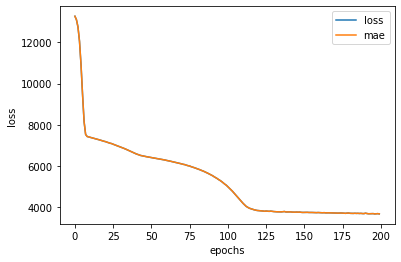

In [39]:
#Plot history(also known as a lost curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)
in terms of scaling values, neural nerworks tend to perform normalization.

IF you are unsure on which to use try both and see which one performs better.

In [41]:
#Read in insurance dataframe
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
#To prepare our data we can borrow a few classes from sci-kitlearn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #Turns all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X & y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

#Fit the column transformer of our training data
ct.fit(X_train)

#Transform Training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [44]:
#What does data look like now?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

BEAUTIFUL our data has been normalized and one hot encoded. Now lets build a NN Model


In [46]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [48]:
tf.random.set_seed(42)
#1 create a model

insurance_model_normal = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                            tf.keras.layers.Dense(1)])

#2 Compile the model

insurance_model_normal.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
#3. fit the model

history = insurance_model_normal.fit(X_train_normal,y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 845us/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 810us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 764us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 725us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 848us/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 793us/step - loss: 13066.45

In [49]:
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 824us/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [50]:
#Save Models in TF PB
insurance_model_normal.save("Best_MedicalCost_InsuranceModel")



INFO:tensorflow:Assets written to: Best_MedicalCost_InsuranceModel/assets


In [51]:
insurance_model_normal.save("Best_MedicalHDF5_Insuranceformat.h5")